## 1. Prerequisites
To get the most out of this course you should be able to manipulate data in [Python] with 
- the [pandas library](https://pandas.pydata.org/docs/getting_started/index.html) have a basic level of understanding how to manipulate datetime objects have a decent foundation on plotting in Python, with 
- either [matplotlib](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) or 
- [seaborn](https://seaborn.pydata.org/) packages and have some experience with unsupervised learning, specifically with [kmeans clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans).

We will cover some of the in the class but we expect that you have some knowledge of each in order to learn the most from this course.

#### What is cohort analysis?
Cohort analysis is a descriptive analytics tool. 

- It groups the customers into **mutually exclusive** cohorts - which are then measured over time.\\
- Cohort analysis provides deeper insights than the so-called vanity metrics. It helps with understanding the high level trends better by providing **insights on metrics across** both the **product and the customer lifecycle**.

#### Types of cohorts
There are three major types of cohorts. 
- 1) [Time cohorts]() are customers who signed up for a product or service during a `particular time frame`. Analyzing these cohorts shows the customers’ behavior depending **on** the `time they started using` the company’s `products or services`. The time may be `monthly` or `quarterly`, even `daily`. 
- 2) [Behavior cohorts]() are customers `who purchased a product or subscribed to a service` in the past. It **groups** `customers` by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understanding the needs of the various cohorts can help a company design custom-made services or products for particular segments. 
- 3) [Size cohorts]() refer to the `various sizes of customers who purchase` company’s `products or services`. This categorization can be based on the amount of spending in some period of time after acquisition, or the product type that the customer spent most of their order amount in some period of time. 

Now, let's look at the main elements of the cohort analysis.

In [1]:
import pandas as pd
corhort_counts = pd.read_csv(r"../input/chapter-1-dataset/cohort_counts.csv")
corhort_counts

,CohortMonth,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
1,2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2,2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
3,2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
4,2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
5,2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
6,2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-09-01,279.0,56.0,78.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Elements of cohort analysis
- The cohort analysis data is typically formatted as a `pivot table`.
- The row values represent the cohort. In this case it's the month of the first purchase and customers are pooled into these groups based on their first ever purchase.
- The column values represent months since acquisition. It can be measured in other time periods like months, days, even hours or minutes. That depends on the scope of the analysis.
- Finally, the metrics are in the table. Here, we have the count of active customers. The first column with cohort index "one" represents the total number of customers in that cohort. This is the month of their first transaction. We will use this data in the next lessons to calculate the retention rate and other metrics.

### 1.2. PRACTICES
#### Exercise 1.2.1. How many customers acquired?
We have printed the cohort_counts table you've seen in the video. How many customers have made their first transaction in January 2011?

In [2]:
corhort_counts

,CohortMonth,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
1,2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2,2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
3,2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
4,2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
5,2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
6,2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-09-01,279.0,56.0,78.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Answers.
So, in `Jan-2011`, we look at the 2nd row at the index `2011-01-01` and the first transaction is `column 1`; hence the number of transactions in `Jan-2011` is 332.

#### Exercise 1.2.2. How many customer made the transactions in `Dec-2010`?

In [3]:
dec_2010 = corhort_counts.iloc[0, 1:]
dec_2010.sum()

3728.0

## 2. Cohort analysis.
### 2.1. Theory
Now we will learn about the most popular cohort analysis type - time cohorts. We will segment customers into acquisition cohorts based on the month they made their first purchase. We will then assign the cohort index to each purchase of the customer. It will represent the number of months since the first transaction.

#### Cohort analysis heatmap
Time based cohorts group customers by the time they completed their first activity. 
- In this lesson, we will group customers into cohorts based on the month of their first purchase. 
- Then we will mark each transaction based on its relative time period since the first purchase. 

In this example, we will calculate the number of months since the acquisition. In the next step we will calculate metrics like retention or average spend value, and build this heatmap.

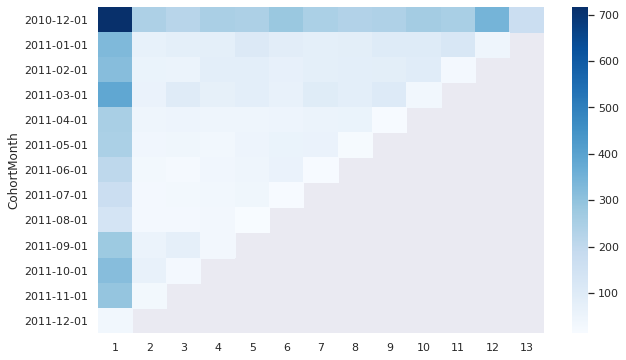

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(corhort_counts.set_index('CohortMonth'), cmap='Blues', ax = ax)
plt.show()

#### Cohort analysis heatmap
Column one here is the month of first purchase, therefore the retention rate is 100%. 

This is by definition, as customers had to be active on this month to be assigned to this cohort.

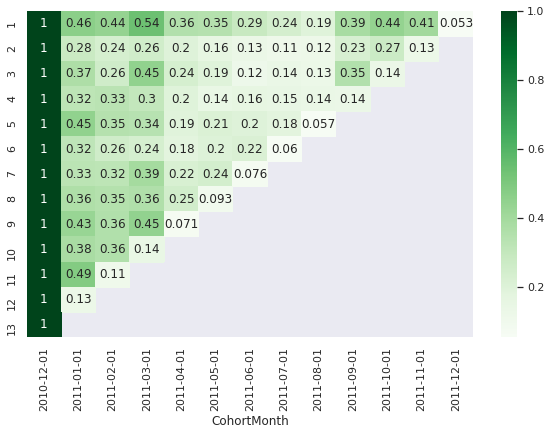

In [5]:
tab = corhort_counts.set_index('CohortMonth') / corhort_counts.set_index('CohortMonth').iloc[0,:]
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(tab.T, annot=True, cmap='Greens', ax = ax)
plt.show()

#### Online retail data
A little bit about data. We will use a 20% random sample from an Online retail dataset with half a million transactions. This is a realistic dataset with customer transactions which is commonly used in segmentation. Let's look at the first 5 rows of it.

In [6]:
online = pd.read_csv(r"../input/chapter-1-dataset/online.csv")
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


#### Top 5 rows of data
The data contains 7 columns with the customer transactions. The main ones we will use are: date, price, and the customerID. Now that we have loaded the data, let's build a simple cohort table for time-based cohorts.

#### Assign acquisition month cohort
- First, we create a function that truncates a given date object to a first day of the month.
- Then we apply it to the InvoiceDate and create an InvoiceMonth column. 
- Next, we create a groupby() object with CustomerID, and use the InvoiceMonth column for the further manipulation.
- Finally, we use transform() together with a min() function to assign the smallest InvoiceMonth value to each customer. With just that, we have assigned the acquisition month cohort to each customer. 

Let's look at the data. We have added two columns - InvoiceMonth and CohortMonth. Now, let's calculate the time offset!

In [7]:
import datetime as dt

online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)  # return the first day of month in year; e.g, 2020-jan-01, 2018-dec-01

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CorhortMonth'] = grouping.transform('min')
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CorhortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


#### Extract integer values from data
Before we can calculate the time offset, we will first create a helper function which will extract integer values of the year, month and day from a `datetime()` object.

In [8]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    
    return year, month, day

#### Assign time offset value
Now, we will calculate the number of months between any transaction and the first transaction for each customer. We will use the InvoiceMonth and CohortMonth values to do this. We will start by creating two object with year and month integer values from each of the InvoiceMonth and CohortMonth variables. Then we will calculate the differences in years and months between them. Finally, we will convert the total difference to months by multiplying the year difference by 12 and adding them together. You can see, there's a "+1" in the end. We do this so the first month is marked as 1 instead of 0 for easier interpretation. You can see that the new column is added. 

Now, let's pull some metrics!

In [9]:
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
corhort_year, corhort_month, _ = get_date_int(online, 'CorhortMonth')

year_diff = invoice_year - corhort_year
month_diff = invoice_month - corhort_month

online['CorhortIndex'] = year_diff*12 + month_diff + 1
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CorhortMonth,CorhortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


#### Count monthly active customers from each cohort
Now we will calculate the number of monthly active customers in each cohort. 
- First, we will create a groupby object with CohortMonth and CohortIndex. 
- Then, we will count number of customers in each group by applying pandas nunique() function. 
- Then, we reset the index and create a pandas pivot with CohortMonth in the rows, CohortIndex in the columns, and CustomerID counts as values. 

Let's take a look at our table.

In [10]:
grouping = online.groupby(['CorhortMonth', 'CorhortIndex'])
corhort_data = grouping['CustomerID'].apply(pd.Series.nunique)
corhort_data = corhort_data.reset_index()

corhort_count = corhort_data.pivot(index = 'CorhortMonth',
                                   columns = 'CorhortIndex',
                                   values = 'CustomerID'
                                  )

#### Table with monthly active customers for each cohort
This is the result! We have created a table that will serve as the basis for the rest of this chapter.

In [11]:
corhort_count

CorhortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CorhortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Cohort metrics
Great! We have assigned the cohorts and calculated the monthly offset for the metrics. Now we will learn how to calculate business metrics for these customer cohorts. We will start by using the cohort counts table from our previous lesson to calculate customer retention. Then we will calculate the average purchase quantity.

#### Customer retention: cohort_counts table
The retention measures how many customers from each of the cohort have returned in the subsequent months. We will use the dataframe called `cohort_counts` which we created in the previous lesson. 

Our first step is to select the first column which is the total number of customers in the cohort.

In [12]:
corhort_count

CorhortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CorhortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, we will calculate the ratio of how many of these customers came back in the subsequent months which is the retention rate. One word of caution, you will see that the first month's retention - by definition - will be 100% for all cohorts.

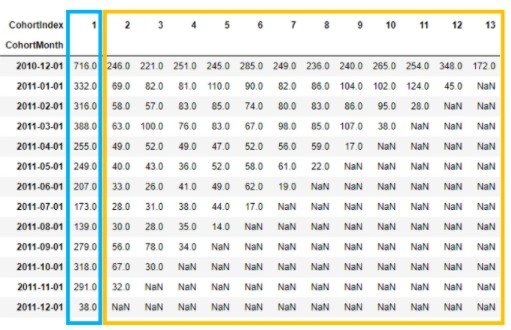

In [13]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

This is because the number of active customers in the first month is actually the size of the cohort.

#### Calculate retention rate
Let's get down to coding! 
- We will select the first column from the table and store it as cohort_sizes. 
- Then we will use the divide() function on the cohort_counts dataframe and pass the cohort_sizes. We set the axis parameter to zero to ensure the we divide along the row axis.
- Finally, we round the ratio to 3 digits and multiply it by a 100 to make it look like a percentage. With these simple commands we have completed retention metric calculation. 

Let's take a look at it.

In [14]:
corhort_sizes = corhort_count.iloc[:, 0]

retention = corhort_count.divide(corhort_sizes, axis = 0)

reten_tab = retention.round(3) * 100

#### Retention table
As you can see, the first column has a 100% retention rate for all cohorts, as expected. We can now compare the retention rate over time and across cohorts to evaluate the health of our customers' shopping habits. 

**Retention gives you the percentage of active customers compared to the total number of customers!!**

Let's take a look at another example.

In [15]:
reten_tab

CorhortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CorhortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Other metrics
Let's step back a little bit and go back to our original online dataset. We will show you how to calculate other metrics for these cohorts. These are almost identical lines of code you've seen in the previous slide where we created the customer_counts. What's different is that in this case we will calculate the average quantity. 
- First, we create a groupby() object with CohortMonth and CohortIndex and store it as grouping. 
- Then, we call this object, select the Quantity column and calculate the average.
- Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices. 
- Finally, we create a pivot table by passing CohortMonth to the index parameter, CohortIndex to the columns parameter, and the Quantity to the values parameter. Let's round it up to 1 digit, and see what we get.

In [16]:
grouping = online.groupby(['CorhortMonth', 'CorhortIndex'])
corhort_data = grouping['Quantity'].mean()
corhort_data = corhort_data.reset_index()

avg_quantity = corhort_data.pivot(index = 'CorhortMonth',
                                  columns = 'CorhortIndex',
                                  values = 'Quantity'
                                 )



#### Average quantity for each cohort
Here we go! You are now fully equipped to manipulate transactional customer data and draw powerful insights.

In [17]:
avg_quantity.round(1)

CorhortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CorhortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2. PRACTICES
#### Exercise. Calculate average price
You will now calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts.

In [18]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CorhortMonth', 'CorhortIndex']) 

# Calculate the average of the unit price 
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CorhortMonth', columns='CorhortIndex', values='UnitPrice')
average_price.round(1)

CorhortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CorhortMonth,,,,,,,,,,,,,
2010-12-01,3.0,3.0,3.0,2.8,2.7,6.9,2.8,3.0,2.7,2.7,3.0,2.8,2.6
2011-01-01,3.2,3.1,3.0,3.0,3.1,3.0,3.0,2.5,2.7,2.9,2.6,2.0,NaN
2011-02-01,3.1,4.0,3.3,2.9,3.3,2.9,2.8,2.7,2.9,2.7,3.1,NaN,NaN
2011-03-01,3.5,3.6,3.5,2.8,2.7,2.5,2.7,2.9,2.5,2.4,NaN,NaN,NaN
2011-04-01,3.3,4.4,3.4,2.6,2.8,2.8,2.8,2.6,2.6,NaN,NaN,NaN,NaN
2011-05-01,3.1,2.8,2.5,2.7,2.5,2.3,2.7,2.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,2.8,2.4,2.7,3.1,2.5,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,3.2,3.1,3.4,2.5,2.4,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,2.9,3.7,5.4,6.9,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Cohort analysis visualization
Welcome to the final lesson on cohort analysis. In this section, we will learn how to build powerful cohort analysis visualizations.

#### Heatmap
The most effective way to visualize and analyze cohort analysis data is through a heatmap. It provides both the actual metric values, and the color coding to see the differences in the numbers visually. One of the best things about heatmaps is that they are very easy to build with Python's seaborn package.

#### Load the retention table
First, we will load the retention table in a pivot format which we built in the previous lesson. It has the same format of data, with the lower right triangle filled with Not-A-Number values. This is expected as the more recent cohorts had less time to be active. You will see in the next page, that having NaN values helps producing a clean heatmap.

#### Build the heatmap
Let's get down to visualizing the retention rates as a heatmap. The first step is to load the packages seaborn and pyplot. Next, we create an empty figure with pre-defined width and height in inches. We can customize this view depending on the format of the data. Then, we add a title to the table. And then we call the seaborn heatmap function. We pass the retention table to the data parameter, ensure the numbers are also printed by passing True value to the annotation argument. Then define the format as percentage with one decimal value. The vmin and vmax parameters are used to anchor the colormap and make sure the outliers don't impact the visualization. Finally, we pass the `Green` palette to the color map. You can find multiple other color palettes in seaborn documentation. We can now run the plot show function to bring the heatmap to life.

#### Retention heatmap
Here we go, the retention rate heatmap that we've seen through this chapter is finally built with just a few lines of code. This visualization can be used as a standalone representation of company's retention rate, or as an analytical tool to get insights.

### PRACTICE
#### Exercise. Visualize average quantity metric
You are now going to visualize average quantity values in a heatmap.

We have loaded pandas package as pd, and the average quantity values DataFrame as `avg_quantity`.

#### SOLUTION

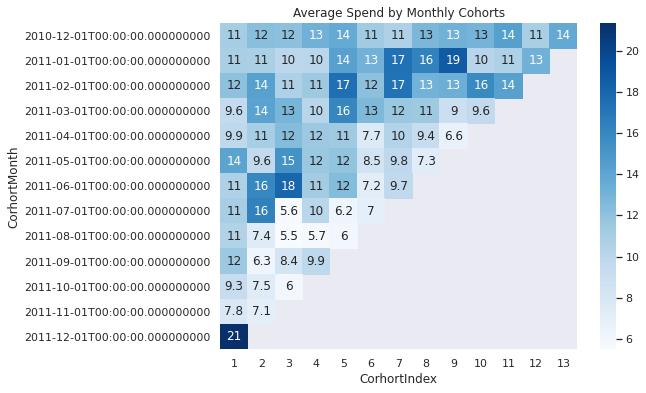

In [19]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(avg_quantity, annot=True, cmap='Blues')
plt.show()